## Data Analysis and Visualizations

In [215]:
twitter_archive_master.describe()

,rating_numerator,rating_denominator,Year,Hour,favorite_count,retweet_count,img_num,Frist_pred_conf,Second_pred_conf,Third_pred_conf
count,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2.073000e+03,2.073000e+03
mean,12.250362,10.496382,2015.864930,9.684515,8583.081524,2959.425953,1.203087,0.594555,1.345907e-01,6.034121e-02
std,40.690796,7.125469,0.698931,8.629875,12281.014912,5029.269674,0.561601,0.271217,1.006855e-01,5.092740e-02
min,0.000000,7.000000,2015.000000,0.000000,0.000000,15.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,2015.000000,1.000000,1665.000000,630.000000,1.000000,0.364095,5.387110e-02,1.619920e-02
50%,11.000000,10.000000,2016.000000,4.000000,3846.000000,1401.000000,1.000000,0.588230,1.181810e-01,4.947150e-02
75%,12.000000,10.000000,2016.000000,18.000000,10902.000000,3420.000000,1.000000,0.843911,1.955580e-01,9.193000e-02
max,1776.000000,170.000000,2017.000000,23.000000,132318.000000,79116.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


## We know:
1. 总共2073个有效数据；使用热度变化会是如何呢？
2. 平均点赞数为8583，平均转发数为2959， 最大点赞数，转发次数分别为132318，79116， 所以，转发点赞数有什么一般关系呢？
3. 评分的分子分母（rating_numerato／rating_denominator）分别是12.250362／10.496382， 一般来说分子大于分母
4. 第一次狗狗图片预测平均概率为0.594555，中值为0.588230， 不知道预测率会不会有明显提升趋势呢？

In [220]:
import matplotlib.pyplot as plt
% matplotlib inline

In [214]:
### 1. This tweep hot trends

In [218]:
tweets_per_month = twitter_archive_master.groupby(['Month', 'Year'], sort=False).count().iloc[::-1, 0]
tweets_per_month

Month      Year
November   2015    298
December   2015    367
January    2016    169
February   2016    111
March      2016    121
April      2016     54
May        2016     57
June       2016     81
July       2016     94
August     2016     64
September  2016     71
October    2016     71
November   2016     69
December   2016     61
January    2017     77
February   2017     68
March      2017     53
April      2017     44
May        2017     45
June       2017     46
July       2017     50
August     2017      2
Name: tweet_id, dtype: int64

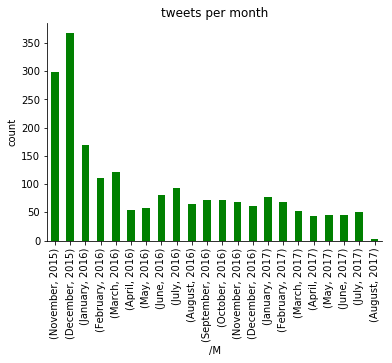

In [229]:
fig, ax = plt.subplots()
tweets_per_month.plot(kind='bar', color='g')
#tweets_per_month.plot(kind='line', color='r')
ax.set_title('tweets per month')
ax.set_ylabel('count')
ax.set_xlabel('/M')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

### 2. favorite_count &	retweet_count

In [230]:
ratio = twitter_archive_master['favorite_count'] / twitter_archive_master['retweet_count']

In [231]:
ratio.describe()

count    2073.000000
mean        3.236245
std         1.308540
min         0.000000
25%         2.486004
50%         3.148541
75%         3.890883
max        12.024368
dtype: float64

In [232]:
twitter_archive_master['favorite_count'].corr(twitter_archive_master['retweet_count'])

0.80698364190817873

> 从中位数和平均数看，大约3.2次点赞会转发一次, 相关性很高

### 3. 

In [238]:
tweets_p1_month = twitter_archive_master.loc[:, ['Month', 'Year', 'Frist_pred_conf']]

In [244]:
tweets_p1_month['M_Y'] = tweets_p1_month.loc[:, 'Month'].astype(str) + '-' + tweets_p1_month.loc[:, 'Year'].astype(str)

In [247]:
tweets_p1_month = tweets_p1_month.drop(['Month', 'Year'], axis=1)
tweets_p1_month.head()

,Frist_pred_conf,M_Y
0,0.097049,August-2017
1,0.323581,August-2017
2,0.716012,July-2017
3,0.170278,July-2017
4,0.555712,July-2017


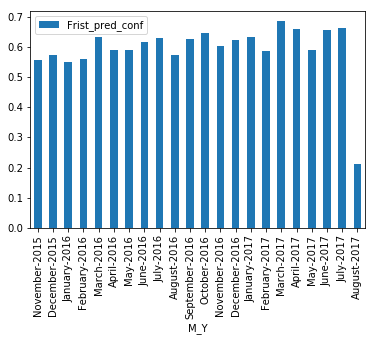

In [266]:
tweets_p1_month.groupby('M_Y', sort=False).mean()[::-1].plot(kind='bar')

In [267]:
## 看来上线后正确率没有明显提高趋势， 没有更新参数或者说2000个tweet图片对训练并没有明显提高

In [269]:
## 如何给狗狗取名字呢，先看看大家喜欢去什么名字
twitter_archive_master['dog_name'].value_counts()

None        577
a            54
Charlie      11
Cooper       10
Tucker       10
Oliver       10
Lucy         10
Penny        10
Sadie         8
Bo            8
Lola          8
Winston       8
Daisy         7
Toby          7
Jax           6
Milo          6
Rusty         6
Scout         6
Stanley       6
Koda          6
Bella         6
Bailey        6
an            6
Dave          6
Alfie         5
Leo           5
the           5
Chester       5
Larry         5
Buddy         5
           ... 
Akumi         1
Flash         1
Yoda          1
Travis        1
Taz           1
Kloey         1
Geno          1
Carper        1
Ike           1
Einstein      1
Monster       1
Obi           1
Sweet         1
Danny         1
Tyrone        1
Ed            1
Crouton       1
Chesney       1
Tassy         1
Brownie       1
Bobby         1
Hermione      1
Kona          1
Ricky         1
Pipsy         1
Kingsley      1
Barney        1
Timofy        1
Erik          1
Rupert        1
Name: dog_name, Length: 

None or a 肯定大多不是狗狗名字，看来给狗狗取名还是很随便的，没有趋势和潮流的